# Superstore Sales Analysis
### Analyzing 10,000+ sales transactions to uncover revenue trends and profitability insights
**Tools:** Python, MySQL, pandas, matplotlib

In [2]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1286399Ben",  # replace with your actual password
    database="sales_analysis"
)
cursor = conn.cursor()
print("Connected to MySQL!")

Connected to MySQL!


## 1. Data Overview
Quick look at the dataset we loaded into MySQL.

In [3]:
# Load the full table into a dataframe for exploration
df = pd.read_sql("SELECT * FROM orders", conn)

print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

/Users/bennguyen/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Rows: 9994, Columns: 21


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


## 2. Sales by Category
Which product category drives the most revenue?

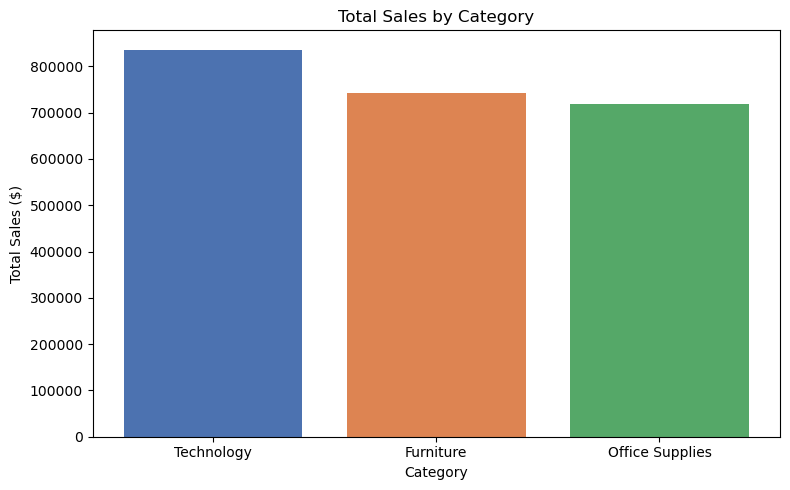

In [4]:
cursor.execute("""
    SELECT category, ROUND(SUM(sales), 2) AS total_sales
    FROM orders
    GROUP BY category
    ORDER BY total_sales DESC
""")
data = cursor.fetchall()
categories = [row[0] for row in data]
sales = [row[1] for row in data]

plt.figure(figsize=(8, 5))
plt.bar(categories, sales, color=['#4C72B0', '#DD8452', '#55A868'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

## 3. Profit by Region
Which region is the most profitable?

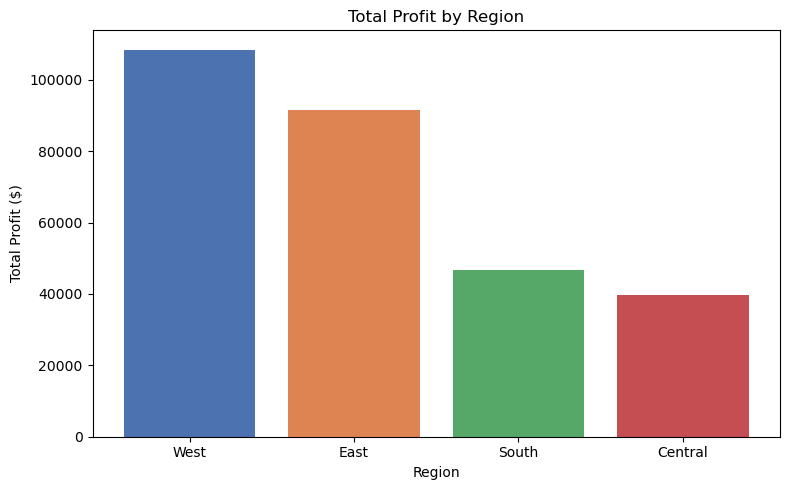

In [5]:
cursor.execute("""
    SELECT region, ROUND(SUM(profit), 2) AS total_profit
    FROM orders
    GROUP BY region
    ORDER BY total_profit DESC
""")
data = cursor.fetchall()
regions = [row[0] for row in data]
profits = [row[1] for row in data]

plt.figure(figsize=(8, 5))
plt.bar(regions, profits, color=['#4C72B0', '#DD8452', '#55A868', '#C44E52'])
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit ($)')
plt.tight_layout()
plt.show()

## 4. Top 5 Most Profitable Sub-Categories
Which specific product types make the most money?

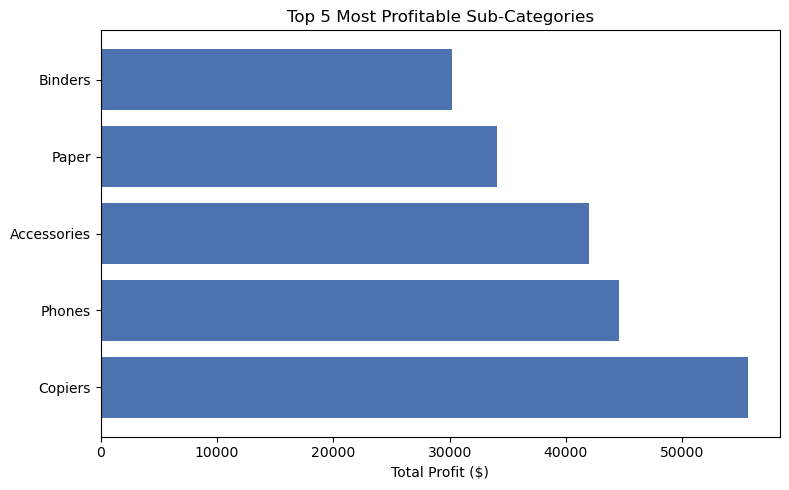

In [6]:
cursor.execute("""
    SELECT sub_category, ROUND(SUM(profit), 2) AS total_profit
    FROM orders
    GROUP BY sub_category
    ORDER BY total_profit DESC
    LIMIT 5
""")
data = cursor.fetchall()
subcats = [row[0] for row in data]
profits = [row[1] for row in data]

plt.figure(figsize=(8, 5))
plt.barh(subcats, profits, color='#4C72B0')
plt.title('Top 5 Most Profitable Sub-Categories')
plt.xlabel('Total Profit ($)')
plt.tight_layout()
plt.show()

## 5. Worst 5 States by Profit
Which states are losing us the most money?

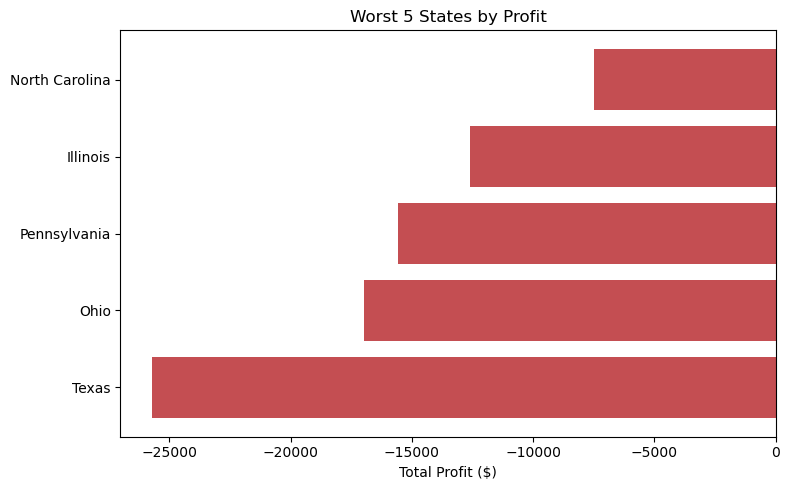

In [7]:
cursor.execute("""
    SELECT state, ROUND(SUM(profit), 2) AS total_profit
    FROM orders
    GROUP BY state
    ORDER BY total_profit ASC
    LIMIT 5
""")
data = cursor.fetchall()
states = [row[0] for row in data]
profits = [row[1] for row in data]

plt.figure(figsize=(8, 5))
plt.barh(states, profits, color='#C44E52')
plt.title('Worst 5 States by Profit')
plt.xlabel('Total Profit ($)')
plt.tight_layout()
plt.show()

## 6. Monthly Sales Trend
How do sales fluctuate throughout the year?

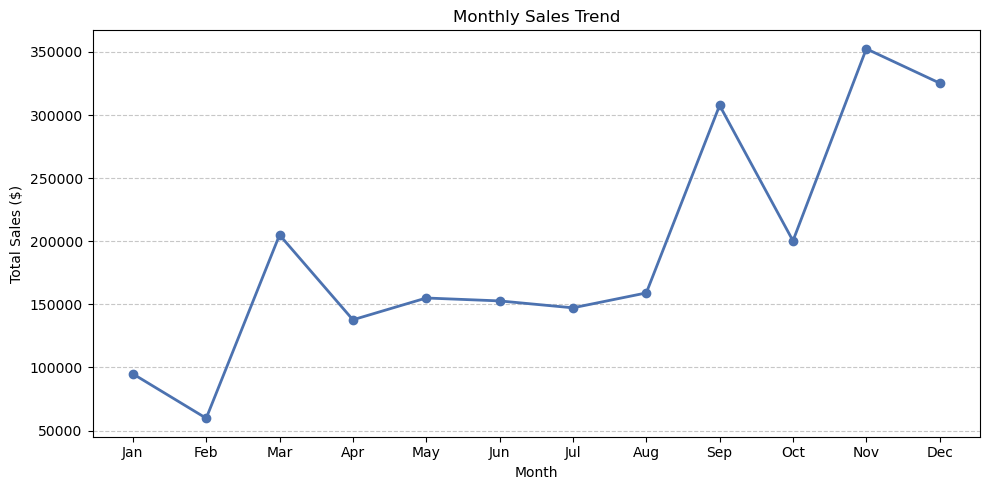

In [8]:
cursor.execute("""
    SELECT MONTH(STR_TO_DATE(order_date, '%m/%d/%Y')) AS month,
           ROUND(SUM(sales), 2) AS total_sales
    FROM orders
    GROUP BY month
    ORDER BY month ASC
""")
data = cursor.fetchall()
months = [row[0] for row in data]
sales = [row[1] for row in data]

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 5))
plt.plot(month_names, sales, marker='o', color='#4C72B0', linewidth=2)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7. Key Insights & Conclusions
A summary of the most important findings from this analysis.

In [9]:
# Summary statistics
cursor.execute("SELECT ROUND(SUM(sales), 2) FROM orders")
total_sales = cursor.fetchone()[0]

cursor.execute("SELECT ROUND(SUM(profit), 2) FROM orders")
total_profit = cursor.fetchone()[0]

cursor.execute("SELECT ROUND(AVG(discount), 2) FROM orders")
avg_discount = cursor.fetchone()[0]

cursor.execute("SELECT ROUND((SUM(profit) / SUM(sales)) * 100, 2) FROM orders")
profit_margin = cursor.fetchone()[0]

print(f"Total Revenue:     ${total_sales:,}")
print(f"Total Profit:      ${total_profit:,}")
print(f"Profit Margin:     {profit_margin}%")
print(f"Average Discount:  {avg_discount * 100}%")

# Close connection
cursor.close()
conn.close()

Total Revenue:     $2,297,201.07
Total Profit:      $286,397.79
Profit Margin:     12.47%
Average Discount:  16.00%

Analysis complete!


## Conclusions

Based on the analysis of 9,994 sales transactions:

- **Technology** is the highest revenue category, while **Office Supplies** is the most profitable relative to its size
- The **West region** leads in profitability, while the **Central region** underperforms despite reasonable sales volume
- **Copiers** and **Phones** are the most profitable sub-categories
- **Texas, Ohio, and Pennsylvania** are the worst performing states and may warrant a pricing or discount strategy review
- Sales peak in **November and December**, suggesting strong seasonal demand — inventory and staffing should reflect this

### Recommendations
- Reduce discounting in underperforming states as high discounts are likely eroding margins
- Invest more in Technology and Copier product lines given their strong profitability
- Plan promotions and inventory around the Q4 sales surge